In [1]:
using JSON
using Colors: RGB, HSV, colormap
using CairoMakie

include("../Modules/TestingFunctions.jl")
using .TestingFunctions

In [2]:
default_τs = Dict()

default_τs["ORSESN"] = Dict()

default_τs["ORSESN"]["multi_step"] = Dict()
default_τs["ORSESN"]["multi_step"]["Lorenz 0_01"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["ORSESN"]["multi_step"]["Lorenz 0_05"] = Dict(2 => 10, 3 => 10, 4 => 4) # 4 (but 10 also good) -> just use 4
default_τs["ORSESN"]["multi_step"]["Rossler 0_1"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["ORSESN"]["multi_step"]["Rossler 0_5"] = Dict(2 => 4, 3 => 4, 4 => 4)
default_τs["ORSESN"]["multi_step"]["MG 0_5"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["ORSESN"]["multi_step"]["MG 2_5"] = Dict(2 => 50, 3 => 50, 4 => 50) # 150 for m=2,3 and 50 for m=4 -> just use 50

default_τs["ORSESN"]["single_step"] = Dict()
default_τs["ORSESN"]["single_step"]["Lorenz 0_01"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["ORSESN"]["single_step"]["Lorenz 0_05"] = Dict(2 => 4, 3 => 4, 4 => 4)
default_τs["ORSESN"]["single_step"]["Rossler 0_1"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["ORSESN"]["single_step"]["Rossler 0_5"] = Dict(2 => 4, 3 => 4, 4 => 4)
default_τs["ORSESN"]["single_step"]["MG 0_5"] = Dict(2 => 20, 3 => 20, 4 => 20) # -> to test again with tau > 100 -> just use 20
default_τs["ORSESN"]["single_step"]["MG 2_5"] = Dict(2 => 50, 3 => 50, 4 => 20) # 50 for m=2,3 and 20 for m=4 -> just use 50

default_τs["OPESN"] = Dict()

default_τs["OPESN"]["multi_step"] = Dict()
default_τs["OPESN"]["multi_step"]["Lorenz 0_01"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["OPESN"]["multi_step"]["Lorenz 0_05"] = Dict(2 => 10, 3 => 10, 4 => 4) # 4 (but 10 good for m=2,3) -> preference just 4 but check direct
default_τs["OPESN"]["multi_step"]["Rossler 0_1"] = Dict(2 => 20, 3 => 20, 4 => 10) # for m=2,3 and = 10 for m=4 -> very  big error for tau=20,m=4
default_τs["OPESN"]["multi_step"]["Rossler 0_5"] = Dict(2 => 20, 3 => 20, 4 => 10) # for m=2,3 and = 10 for m=4 -> very  big error for tau=20,m=4
default_τs["OPESN"]["multi_step"]["MG 0_5"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["OPESN"]["multi_step"]["MG 2_5"] = Dict(2 => 50, 3 => 50, 4 => 50)

default_τs["OPESN"]["single_step"] = Dict()
default_τs["OPESN"]["single_step"]["Lorenz 0_01"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["OPESN"]["single_step"]["Lorenz 0_05"] = Dict(2 => 4, 3 => 4, 4 => 4)
default_τs["OPESN"]["single_step"]["Rossler 0_1"] = Dict(2 => 10, 3 => 20, 4 => 10) # 10 for 2,4 and 20 for 3 -> preference 20
default_τs["OPESN"]["single_step"]["Rossler 0_5"] = Dict(2 => 10, 3 => 10, 4 => 4) # for m=2,3 and = 10 for m=4 -> big error otherwise
default_τs["OPESN"]["single_step"]["MG 0_5"] = Dict(2 => 20, 3 => 20, 4 => 20)
default_τs["OPESN"]["single_step"]["MG 2_5"] = Dict(2 => 50, 3 => 50, 4 => 20) # for for m=2,3 and = 20 for m=4 -> HUGE eror otherwise

Dict{Int64, Int64} with 3 entries:
  4 => 20
  2 => 50
  3 => 50

# Input Routing & Gating

In [3]:
architecture = "OPESN"

test_search = Dict(
    "prediction_type" => "multi_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => "Lorenz 0_01",# Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    # "trials" => 30,
    # "total_k" => 468,
    "noise_std" => 0.1
)

test_dict = Dict()

test_search["m"] = 1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Traditional ESN"] = tests[end-1]
println(test_dict["Traditional ESN"]["trials"], " trials")
println(test_dict["Traditional ESN"]["n_steps"])

test_search["m"] = 4
test_search["τ"] = 20

tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * " with partition driven input routing"] = tests[end]
println(test_dict[architecture * " with partition driven input routing"]["trials"], " trials")
println(test_dict[architecture * " with partition driven input routing"]["n_steps"])

test_search["testing_params"]["partition_choose_at_random"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict[architecture * " with random input routing"] = tests[end]
test_search["testing_params"]["partition_choose_at_random"] = false
println(test_dict[architecture * " with random input routing"]["trials"], " trials")
println(test_dict[architecture * " with random input routing"]["n_steps"])

fig = chart_tests(
    "",#m = " * string(test_search["m"]),
    # "ORSESN Readout Gating - Ordinal Partition Driven vs. Random Selection",#\nm = 2",
    "",
    # "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=10,
    # xlim_low=-10,
    # xlim_high=100,
    use_m_for_colour=false,
    put_first="Traditional ESN",
    height=test_search["m"]==4 ? 300 : 220,
    legend_proportion=test_search["m"]==4 ? 0.3 : 0.0,
    include_legend=test_search["m"]==4
)

save(architecture * "_routing_recursive_ordinal_vs_random_m=" * string(test_search["m"]) * ".pdf", fig)

display(fig)

ErrorException: No matching test found

# Sub-Reservoir Connections

In [5]:
test_search = Dict(
    "prediction_type" => "multi_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => "Lorenz 0_01",# Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    # "trials" => 30,
    "total_k" => 468,
    "noise_std" => 0.1
)

test_dict = Dict()

test_search["m"] = 1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Traditional ESN"] = tests[1]

test_search["m"] = 3
test_search["τ"] = 20

tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["One-to-one connections scaled according to ordinal transition probabilities"] = tests[end]

test_search["testing_params"]["layer_connections_one_to_one_constant_value"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["One-to-one connections with constant value connections"] = tests[end]
test_search["testing_params"]["layer_connections_one_to_one_constant_value"] = false

test_search["testing_params"]["layer_connections_one_to_one_randomised"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["One-to-one connections with random normal connections"] = tests[end]
test_search["testing_params"]["layer_connections_one_to_one_randomised"] = false

test_search["testing_params"]["layer_connections_fully_connected_trans_probs"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Fully connected sub-reservoirs scaled according to ordinal transition probabilities"] = tests[end]
test_search["testing_params"]["layer_connections_fully_connected_trans_probs"] = false

test_search["testing_params"]["layer_connections_fully_connected_constant_value"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Fully connected sub-reservoirs with constant value connections"] = tests[end]
test_search["testing_params"]["layer_connections_fully_connected_constant_value"] = false

test_search["testing_params"]["layer_connections_sparsely_connected"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Sparsely connected sub-reservoirs"] = tests[end]
test_search["testing_params"]["layer_connections_sparsely_connected"] = false

test_search["testing_params"]["layer_connections_disconnected"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Disconnected sub-reservoirs"] = tests[end]
test_search["testing_params"]["layer_connections_disconnected"] = false

test_search["testing_params"]["stochastic"] = true
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["One-to-one connections with stochastically activated constant value connections"] = tests[end]
test_search["testing_params"]["stochastic"] = false

fig = chart_tests(
    # "Lorenz 0_01" * " - mean RMSE vs number of prediction steps - Noise = " * string(0.1) * " and τ = " * string(-1),
    "OPESN Sub-Reservoir Connections",
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["mean", "std"],#range", "mean", "std"],
    ylim_low=0,
    ylim_high=9,
    xlim_low=-5,
    xlim_high=110,
    use_m_for_colour=false,
    put_first="Traditional ESN",
    height=660,
    legend_proportion=0.38
)

save("OPESN_recursive_sub_reservoir_connections_m=" * string(test_search["m"]) * ".pdf", fig)

display(fig)

ErrorException: No matching test found

# Noise

In [16]:
test_search = Dict(
    "prediction_type" => "multi_step",
    "testing_params" => Dict(
        "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
        "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
        "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
        "readout_switching" => false,
        "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
        "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
        "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
        "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
        "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
        "layer_connections_disconnected" => false, # no effect
        "add_self_loops" => false # no effect
    ),
    "data" => "Lorenz 0_01",# Extra Long",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    "trials" => 30,
    "total_k" => 468,
    "m" => 1,
    # "τ" => 20
)

test_dict = Dict()

test_search["noise_std"] = 0.0
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Noise σ = 0.0"] = tests[1]

test_search["noise_std"] = 0.1
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Noise σ = 0.1"] = tests[1]

test_search["noise_std"] = 0.2
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Noise σ = 0.2"] = tests[1]

test_search["noise_std"] = 0.3
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Noise σ = 0.3"] = tests[1]

test_search["noise_std"] = 0.5
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Noise σ = 0.5"] = tests[1]

test_search["noise_std"] = 1.0
tests = find_test(test_search)
println(length(tests), " tests found")
test_dict["Noise σ = 1.0"] = tests[1]


fig = chart_tests(
    "OPESN Recursive Prediction for Multiple Noise Levels, m = " * string(test_search["m"]),
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=14,
    use_m_for_colour=false,
    put_first="Traditional ESN"
)

save("OPESN_noise_resilience.pdf", fig)

display(fig)

ErrorException: No matching test found

In [17]:
# Base search parameters without 'm' or 'noise_std'
test_search_base = Dict(
    "prediction_type"    => "multi_step",
    "testing_params"     => Dict(
        "dont_mask_input_vector"               => false,
        "mask_states_b4_readout"               => false,
        "stochastic"                           => false,
        "stochastic_rescale_V_rec"             => false,
        "partition_choose_at_random"           => false,
        "partition_take_turns"                 => false,
        "readout_switching"                    => true,
        "layer_connections_one_to_one_constant_value"  => false,
        "layer_connections_one_to_one_randomised"      => false,
        "layer_connections_fully_connected_trans_probs"=> false,
        "layer_connections_fully_connected_constant_value"=> false,
        "layer_connections_sparsely_connected" => false,
        "layer_connections_disconnected"       => false,
        "add_self_loops"                       => false
    ),
    "data"               => "Lorenz 0_01",
    "testing_parameter"  => "n_steps",
    "ignore_first"       => 100,
    # "trials"             => 30,
    "total_k"            => 468,
    "τ"                  => 20,
    "n_steps"            => [1,2,3,5,10,20,30,40,50,70,100]
)

palette = ["#0072B2", "#E69F00", "#009E73", "#CC79A7"]

# The noise levels we want to compare
noise_levels = [0.0, 0.1, 0.3, 0.5, 1.0]

# Create a 2×2 GridLayout: two columns (m=2, m=3)
fig = Figure(size = (600, 300), dpi = 300)
gl  = fig[1, 1] = GridLayout(1, 2)

# Loop over m = 2 and m = 3
for (col, m) in enumerate(1:4)
    # build a fresh test_search dict for this m
    test_search = deepcopy(test_search_base)
    test_search["m"] = m
    if m == 1
        test_search["τ"] = 1
    else
        test_search["τ"] = 20
    end

    if m == 4
        pop!(test_search, "total_k")
    end

    # collect the first test for each noise level
    test_dict = Dict{Float64, Any}()
    for α in noise_levels
        test_search["noise_std"] = α
        tests = find_test(test_search)
        println(length(tests), " tests found for m=", m, ", α=", α)
        test_dict[α] = tests[end]
    end

    # extract the RMSE means at selected steps
    steps_1   = [test_dict[α]["measurements"]["RMSE"]["mean"][1]  for α in noise_levels]
    steps_20  = [test_dict[α]["measurements"]["RMSE"]["mean"][6]  for α in noise_levels]
    steps_50  = [test_dict[α]["measurements"]["RMSE"]["mean"][9]  for α in noise_levels]
    steps_100 = [test_dict[α]["measurements"]["RMSE"]["mean"][11] for α in noise_levels]

    # plot into the grid and label lines directly
    
    ax = Axis(gl[1, col],
        xlabel = "Noise α",
        ylabel = col == 1 ? "RMSE" : "",
        title  = "m = " * string(m)
    )
    
    xlims!(ax, -0.1, maximum(noise_levels) + 0.1)
    ylims!(ax, 0, 10)

    # draw each curve and place a text label at its endpoint
    lines!(ax, noise_levels, steps_100, color = palette[1])
    lines!(ax, noise_levels, steps_50, color = palette[2])
    lines!(ax, noise_levels, steps_20, color = palette[3])
    lines!(ax, noise_levels, steps_1, color = palette[4])

    if col == 2
        text!(ax, "100 steps",
            position      = (noise_levels[end], steps_100[end]),
            color         =  palette[1],
            align = (:right, :bottom))
        text!(ax, "50 steps",
            position      = (noise_levels[end-1], steps_50[end-1]),
            color         = palette[2],
            align = (:left, :top))#(:right, :bottom))#
        text!(ax, "20 steps",
            position      = (noise_levels[end], steps_20[end]),
            color         = palette[3],
            align = (:right, :bottom))
        text!(ax, "1 step",
            position      = (noise_levels[end], steps_1[end]),
            color         = palette[4],
            align = (:right, :bottom))
    end
end

save("ORSESN_recursive_noise_resilience.pdf", fig)

display(fig)

ErrorException: No matching test found

# τ

1 tests found for m=2, τ=1
1 tests found for m=2, τ=2
1 tests found for m=2, τ=4
1 tests found for m=2, τ=10
1 tests found for m=2, τ=20
1 tests found for m=2, τ=50
1 tests found for m=3, τ=1
1 tests found for m=3, τ=2
1 tests found for m=3, τ=4
1 tests found for m=3, τ=10
1 tests found for m=3, τ=20
1 tests found for m=3, τ=50
1 tests found for m=4, τ=1
1 tests found for m=4, τ=2
1 tests found for m=4, τ=4
2 tests found for m=4, τ=10
1 tests found for m=4, τ=20
1 tests found for m=4, τ=50
OPESN_tau_direct_Rossler 0_5.pdf


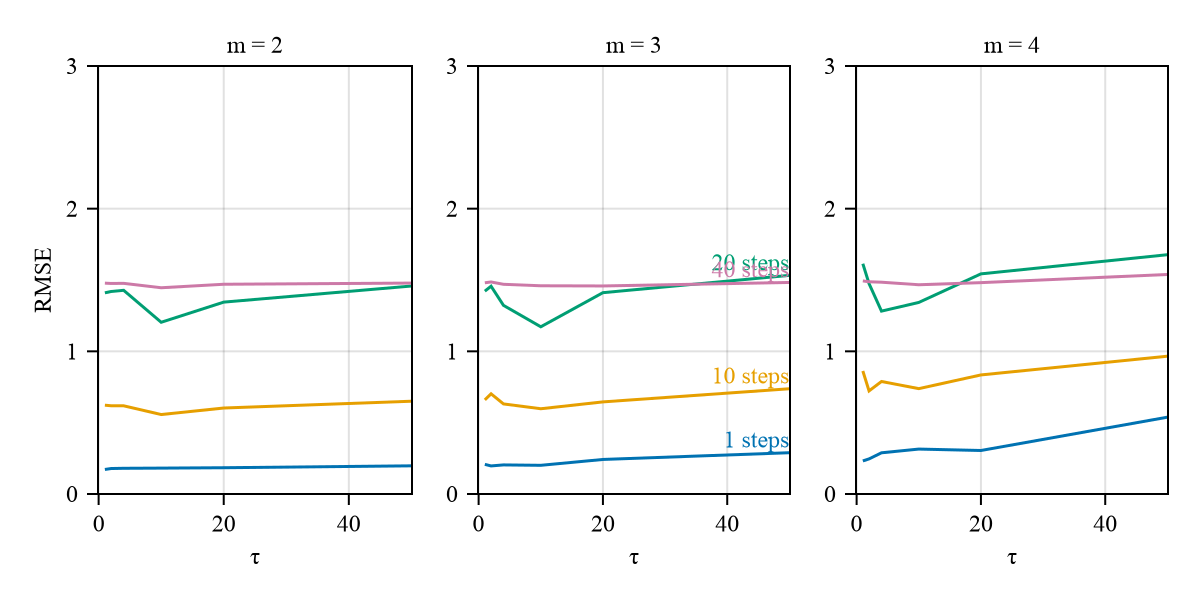

CairoMakie.Screen{IMAGE}


In [18]:
architecture = "OPESN"
prediction_type = "direct"

# Data with an extra 3 taus: ["MG 0_5", "MG 2_5", "Rossler 0_1"]

# data = "Rossler 0_1"
# τs = [1, 2, 10, 20, 50, 100, 120, 150, 200]
# steps_to_show = [1, 20, 50, 100]

data = "Rossler 0_5"
τs = [1, 2, 4, 10, 20, 50]#, 80, 100]#, 150, 200]#, 250]#, 300]
steps_to_show = [1, 10, 20, 40]


five_times_time_step = (data in ["Lorenz 0_05", "Rossler 0_5", "MG 2_5"])

# Base search parameters without 'm' or 'noise_std'
test_search_base = Dict(
    "prediction_type"    => prediction_type == "recursive" ? "multi_step" : "single_step",
    "testing_params"     => Dict(
        "dont_mask_input_vector"               => false,
        "mask_states_b4_readout"               => false,
        "stochastic"                           => false,
        "stochastic_rescale_V_rec"             => false,
        "partition_choose_at_random"           => false,
        "partition_take_turns"                 => false,
        "readout_switching"                    => (architecture == "ORSESN"),
        "layer_connections_one_to_one_constant_value"  => false,
        "layer_connections_one_to_one_randomised"      => false,
        "layer_connections_fully_connected_trans_probs"=> false,
        "layer_connections_fully_connected_constant_value"=> false,
        "layer_connections_sparsely_connected" => false,
        "layer_connections_disconnected"       => false,
        "add_self_loops"                       => false
    ),
    "data"               => data,
    "testing_parameter"  => "n_steps",
    "ignore_first"       => 100,
    # "trials"             => 30,
    "total_k"            => 468,
    # "τ"                  => 20,
    # "n_steps"            => [1,2,3,5,10,20,30,40,50,70,100],
    "noise_std"          => 0.1
)

palette = ["#0072B2", "#E69F00", "#009E73", "#CC79A7", "#D55E00"]

# Create a 2×2 GridLayout: two columns (m=2, m=3)
fig = Figure(size = (600, 300), dpi = 300)
gl  = fig[1, 1] = GridLayout(1, 2)

for (col, m) in enumerate(2:4)
    # build a fresh test_search dict for this m
    test_search = deepcopy(test_search_base)
    test_search["m"] = m

    if m == 4
        pop!(test_search, "total_k")
    end

    # collect the first test for each noise level
    test_dict = Dict{Float64, Any}()
    for τ in τs
        test_search["τ"] = τ
        tests = find_test(test_search)
        println(length(tests), " tests found for m=", m, ", τ=", τ)
        # test_dict[τ] = tests[end]

        # Find the latest test in which steps_to_show is a subset of test["n_steps"]
        found = nothing
        for test in reverse(tests)
            if all(step -> step in test["n_steps"], steps_to_show)
                found = test        
                break
            end
        end
        if isnothing(found)
            error("No test found for τ=$τ with all steps_to_show in n_steps")
        end
        test_dict[τ] = found
    end

    # plot into the grid and label lines directly
    
    ax = Axis(gl[1, col],
        xlabel = "τ",
        ylabel = col == 1 ? "RMSE" : "",
        title  = "m = " * string(m)
    )
    
    xlims!(ax, -0.1, maximum(τs) + 0.1)
    ylims!(ax, 0, 3)#0.12)#occursin("MG", data) ? 0.5 : 10)


    # draw each curve and place a text label at its endpoint
    for (i, n_steps) in enumerate(steps_to_show)
        steps = test_dict[τs[1]]["n_steps"][findfirst(==(n_steps), test_dict[τs[1]]["n_steps"])]
        RMSE_mean = [
            test_dict[τ]["measurements"]["RMSE"]["mean"][findfirst(==(n_steps), test_dict[τ]["n_steps"])]
            for τ in τs
        ]

        lines!(ax, τs, RMSE_mean, color = palette[i])
        if col == 2
            text!(ax, string(steps) * " steps",
                position      = (τs[end], RMSE_mean[end]),
                color         =  palette[i],
                align = (:right, :bottom))
        end
    end
end

println(architecture * "_tau_" * prediction_type * "_" * data * ".pdf")
save(architecture * "_tau_" * prediction_type * "_" * data * ".pdf", fig)

display(fig)

# Key Performance Results

In [3]:
xlims = Dict()

xlims["ORSESN"] = Dict()

xlims["ORSESN"]["Lorenz 0_01"] = Dict()
xlims["ORSESN"]["Lorenz 0_05"] = Dict()
xlims["ORSESN"]["Lorenz 0_01"]["recursive"] = 505
xlims["ORSESN"]["Lorenz 0_05"]["recursive"] = 105
xlims["ORSESN"]["Lorenz 0_01"]["direct"] = 205
xlims["ORSESN"]["Lorenz 0_05"]["direct"] = 42

xlims["ORSESN"]["Rossler 0_1"] = Dict()
xlims["ORSESN"]["Rossler 0_1"]["recursive"] = 505
xlims["ORSESN"]["Rossler 0_1"]["direct"] = 505

xlims["ORSESN"]["MG 0_5"] = Dict()
xlims["ORSESN"]["MG 0_5"]["recursive"] = 305
xlims["ORSESN"]["MG 0_5"]["direct"] = 305

xlims["OPESN"] = Dict()

xlims["OPESN"]["Lorenz 0_01"] = Dict()
xlims["OPESN"]["Lorenz 0_05"] = Dict()
xlims["OPESN"]["Lorenz 0_01"]["recursive"] = 255
xlims["OPESN"]["Lorenz 0_05"]["recursive"] = 105
xlims["OPESN"]["Lorenz 0_01"]["direct"] = 155
xlims["OPESN"]["Lorenz 0_05"]["direct"] = 42

xlims["OPESN"]["Rossler 0_1"] = Dict()
xlims["OPESN"]["Rossler 0_1"]["recursive"] = 505
xlims["OPESN"]["Rossler 0_1"]["direct"] = 505

xlims["OPESN"]["MG 0_5"] = Dict()
xlims["OPESN"]["MG 0_5"]["recursive"] = 205
xlims["OPESN"]["MG 0_5"]["direct"] = 205


205

In [4]:
ylims = Dict()

ylims["ORSESN"] = Dict()

ylims["ORSESN"]["Lorenz 0_01"] = Dict()
ylims["ORSESN"]["Lorenz 0_05"] = Dict()
ylims["ORSESN"]["Lorenz 0_01"]["recursive"] = 12
ylims["ORSESN"]["Lorenz 0_05"]["recursive"] = 12
ylims["ORSESN"]["Lorenz 0_01"]["direct"] = 12
ylims["ORSESN"]["Lorenz 0_05"]["direct"] = 12

ylims["ORSESN"]["Rossler 0_1"] = Dict()
ylims["ORSESN"]["Rossler 0_1"]["recursive"] = 8
ylims["ORSESN"]["Rossler 0_1"]["direct"] = 3

ylims["ORSESN"]["MG 0_5"] = Dict()
ylims["ORSESN"]["MG 0_5"]["recursive"] = 0.35
ylims["ORSESN"]["MG 0_5"]["direct"] = 0.35

ylims["OPESN"] = Dict()

ylims["OPESN"]["Lorenz 0_01"] = Dict()
ylims["OPESN"]["Lorenz 0_05"] = Dict()
ylims["OPESN"]["Lorenz 0_01"]["recursive"] = 12
ylims["OPESN"]["Lorenz 0_05"]["recursive"] = 12
ylims["OPESN"]["Lorenz 0_01"]["direct"] = 12
ylims["OPESN"]["Lorenz 0_05"]["direct"] = 12

ylims["OPESN"]["Rossler 0_1"] = Dict()
ylims["OPESN"]["Rossler 0_1"]["recursive"] = 8
ylims["OPESN"]["Rossler 0_1"]["direct"] = 3

ylims["OPESN"]["MG 0_5"] = Dict()
ylims["OPESN"]["MG 0_5"]["recursive"] = 0.35
ylims["OPESN"]["MG 0_5"]["direct"] = 0.35


0.35

In [7]:
# architecture = "ORSESN"
# prediction_type = "recursive"
# data = "Lorenz 0_01"

for architecture in ["ORSESN", "OPESN"]
    for data in ["Lorenz 0_01", "Lorenz 0_05", "Rossler 0_1", "MG 0_5"]
        for prediction_type in ["recursive", "direct"]
            println(architecture, " ", data, " ", prediction_type)

            prediction_type_2 = prediction_type == "recursive" ? "multi_step" : "single_step"
            do_legend = (data in ["Lorenz 0_05", "Rossler 0_1", "Rossler 0_5", "MG 0_5", "MG 2_5"])

            test_search = Dict(
                "prediction_type" => prediction_type_2,
                "testing_params" => Dict(
                    "dont_mask_input_vector" => false, # slightly better for lower time steps, no effect for most SS: slightly better all round
                    "mask_states_b4_readout" => false, # much worse, worse than random choice on attractor. SS: no effect
                    "stochastic" => false,
                    "stochastic_rescale_V_rec" => false,
                    "partition_choose_at_random" => false, # much worse, worse than vanilla SS: same
                    "partition_take_turns" => false, # this doesn't work properly SS: worse, only as good as vanilla
                    "readout_switching" => (architecture == "ORSESN"),#false,
                    "layer_connections_one_to_one_constant_value" => false, # no effect (like none) SS: same
                    "layer_connections_one_to_one_randomised" => false, # no significant effect, SS: slightly better, but not significant (~1σ)
                    "layer_connections_fully_connected_trans_probs" => false, # slightly worse, ~3σ SS: worse, worse than Vanilla
                    "layer_connections_fully_connected_constant_value" => false, # slightly worse, ~3σ
                    "layer_connections_sparsely_connected" => false, # slightly worse, ~2σ
                    "layer_connections_disconnected" => (architecture == "OPESN"), # no effect
                    "add_self_loops" => false # no effect
                ),
                "data" => data,# Extra Long",
                "testing_parameter" => "n_steps",
                "ignore_first" => 100,
                "trials" => 30,
                # "total_k" => 500,#468,
                "noise_std" => 0.1,
                "ρ" => 1.1
                # "n_steps" => [1, 2, 3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 250, 350, 500]
            )


            test_dict = Dict()

            test_search["m"] = 1
            test_search["τ"] = 1
            tests = find_test(test_search)
            println(length(tests), " tests found")
            test_dict["Traditional ESN"] = tests[end]
            # println(test_dict["Traditional ESN"]["trials"])

            test_search["m"] = 2
            pop!(test_search, "τ", nothing)
            test_search["τ"] = default_τs[architecture][prediction_type_2][data][test_search["m"]]
            tests = find_test(test_search)
            println(length(tests), " tests found")
            test_dict[architecture * ", m = 2"] = tests[end]
            # println(test_dict[architecture * ", m = 2"]["trials"])

            test_search["m"] = 3
            test_search["τ"] = default_τs[architecture][prediction_type_2][data][test_search["m"]]
            tests = find_test(test_search)
            println(length(tests), " tests found")
            test_dict[architecture * ", m = 3"] = tests[end]
            # println(test_dict[architecture * ", m = 3"]["trials"])

            pop!(test_search, "total_k", nothing)
            test_search["m"] = 4
            test_search["τ"] = default_τs[architecture][prediction_type_2][data][test_search["m"]]
            tests = find_test(test_search)
            println(length(tests), " tests found")
            test_dict[architecture * ", m = 4"] = tests[end]
            # println(test_dict[architecture * ", m = 4"]["trials"])

            fig = chart_tests(
                "",
                # "OPESN Recursive Prediction for Multiple Noise Levels, m = " * string(test_search["m"]),
                "Number of prediction steps",
                "RMSE",
                test_dict,
                error_funcs=["RMSE"],
                aggregation_funcs=["range", "mean", "std"],
                ylim_low=0,
                ylim_high=ylims[architecture][data][prediction_type],#35,#12,
                xlim_low=0,
                xlim_high=xlims[architecture][data][prediction_type],#205,
                use_m_for_colour=false,
                put_first="Traditional ESN",
                include_legend=do_legend,
                legend_proportion=do_legend ? 0.25 : 0.0,
                height=do_legend ? 400 : 300
            )

            if architecture == "OPESN"
                save(architecture * "_topline_" * prediction_type * "_" * data * ".pdf", fig)
            end

            open("results.txt", "a") do io
                println(io, architecture, " - ", data, " - ", prediction_type)

                for step in 1:length(test_dict[architecture * ", m = 3"]["n_steps"])
                    for model in ["Traditional ESN", architecture * ", m = 2", architecture * ", m = 3", architecture * ", m = 4"]
                        if length(test_dict[model]["n_steps"]) >= step
                            println(io, model, " over ", test_dict[model]["n_steps"][step], " ", prediction_type, " prediction steps on time series: ", data)
                            for aggregation in ["mean", "std"]
                                println(io, "    ", aggregation, ": ", test_dict[model]["measurements"]["RMSE"][aggregation][step])
                            end
                            if model != "Traditional ESN"
                                if test_dict[model]["measurements"]["RMSE"]["mean"][step] < test_dict["Traditional ESN"]["measurements"]["RMSE"]["mean"][step] - 2*test_dict["Traditional ESN"]["measurements"]["RMSE"]["std"][step]
                                    println(io, "    Statistically signifcantly superior that traditional ESN for 95% CI")
                                else
                                    println(io, "    NOT statistically signifcantly superior than traditional ESN for 95% CI")
                                end
                            end
                        end
                    end
                end

                println(io, "\n\n\n\n")
            end
        

        end
    end
end




# display(fig)

ORSESN Lorenz 0_01 recursive
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN Lorenz 0_01 direct
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN Lorenz 0_05 recursive
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN Lorenz 0_05 direct
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN Rossler 0_1 recursive
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN Rossler 0_1 direct
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN MG 0_5 recursive
1 tests found
1 tests found
1 tests found
1 tests found
ORSESN MG 0_5 direct
1 tests found
1 tests found
1 tests found
1 tests found
OPESN Lorenz 0_01 recursive
1 tests found
1 tests found
1 tests found
1 tests found
OPESN Lorenz 0_01 direct
1 tests found
1 tests found
1 tests found
1 tests found
OPESN Lorenz 0_05 recursive
1 tests found
1 tests found
1 tests found
1 tests found
OPESN Lorenz 0_05 direct
1 tests found
1 tests found
1 tests found
1 tests found
OPESN Rossle

# Rho

default_ρs["OPESN"]["Rossler 0_1"]["recursive"] = Dict(1=>, 2=>, 3=>, 4=>)
m = 1
1 tests found for m=1, ρ=0.8
1 tests found for m=1, ρ=0.9
1 tests found for m=1, ρ=1.0
2 tests found for m=1, ρ=1.1
1 tests found for m=1, ρ=1.2
1 tests found for m=1, ρ=1.3
1 tests found for m=1, ρ=1.4
1 tests found for m=1, ρ=1.5
1 tests found for m=1, ρ=1.7
1 tests found for m=1, ρ=2.0
1 tests found for m=1, ρ=2.4
Optimal ρ: 0.9
Optimal ρ: 1.7
Optimal ρ: 1.4
Optimal ρ: 1.5
Optimal ρ by lowest total RMSE: 1.4
m = 2
1 tests found for m=2, ρ=0.8
1 tests found for m=2, ρ=0.9
1 tests found for m=2, ρ=1.0
2 tests found for m=2, ρ=1.1
1 tests found for m=2, ρ=1.2
1 tests found for m=2, ρ=1.3
1 tests found for m=2, ρ=1.4
1 tests found for m=2, ρ=1.5
1 tests found for m=2, ρ=1.7
1 tests found for m=2, ρ=2.0
1 tests found for m=2, ρ=2.4
Optimal ρ: 0.8
Optimal ρ: 1.7
Optimal ρ: 1.7
Optimal ρ: 1.5
Optimal ρ by lowest total RMSE: 1.7
m = 3
1 tests found for m=3, ρ=0.8
1 tests found for m=3, ρ=0.9
1 tests found for m

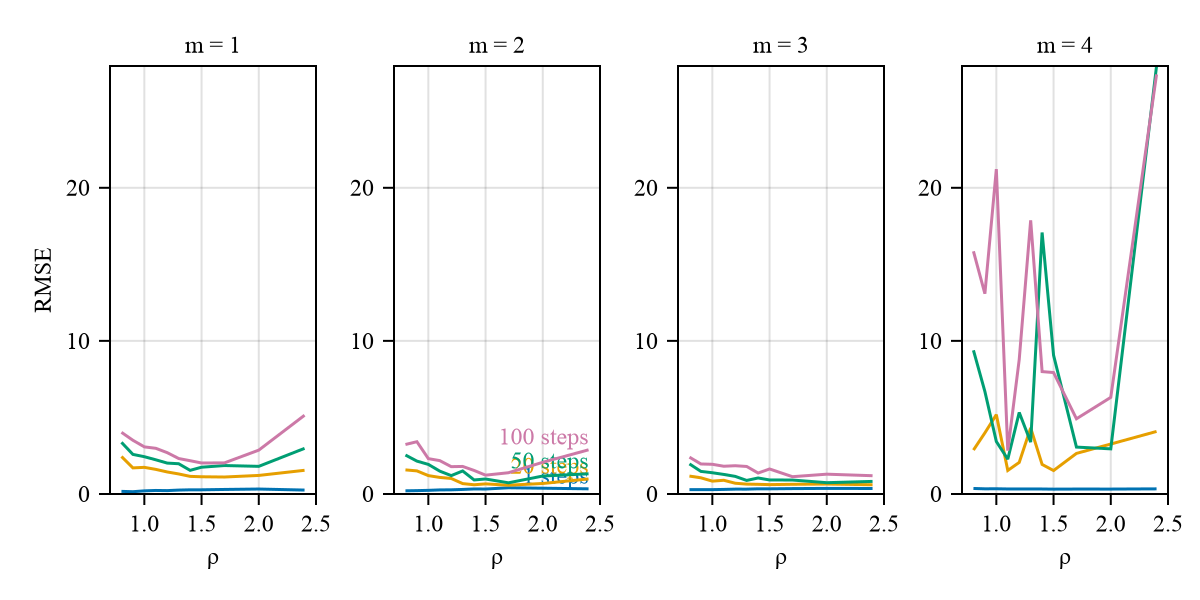

CairoMakie.Screen{IMAGE}


In [27]:
architecture = "OPESN"
prediction_type = "recursive"
# Data with an extra 3 taus: ["MG 0_5", "MG 2_5", "Rossler 0_1"]

data = "Rossler 0_1"
# ρs = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.0, 2.4]
ρs = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.0, 2.4]

five_times_time_step = (data in ["Lorenz 0_05", "Rossler 0_5", "MG 2_5"])

steps_to_show = five_times_time_step ? [1, 10, 20, 40] : [1, 20, 50, 100]

# Base search parameters without 'm' or 'noise_std'
test_search_base = Dict(
    "prediction_type"    => prediction_type == "recursive" ? "multi_step" : "single_step",
    "testing_params"     => Dict(
        "dont_mask_input_vector"               => false,
        "mask_states_b4_readout"               => false,
        "stochastic"                           => false,
        "stochastic_rescale_V_rec"             => false,
        "partition_choose_at_random"           => false,
        "partition_take_turns"                 => false,
        "readout_switching"                    => (architecture == "ORSESN"),
        "layer_connections_one_to_one_constant_value"  => false,
        "layer_connections_one_to_one_randomised"      => false,
        "layer_connections_fully_connected_trans_probs"=> false,
        "layer_connections_fully_connected_constant_value"=> false,
        "layer_connections_sparsely_connected" => false,
        "layer_connections_disconnected"       => (architecture == "OPESN"),
        "add_self_loops"                       => false
    ),
    "data"               => data,
    "testing_parameter"  => "n_steps",
    "ignore_first"       => 100,
    # "trials"             => 30,
    # "total_k"            => 500,
    # "ρ"                  => 20,
    # "n_steps"            => [1,2,3,5,10,20,30,40,50,70,100],
    "noise_std"          => 0.1
)

palette = ["#0072B2", "#E69F00", "#009E73", "#CC79A7", "#D55E00"]

# Create a 2×2 GridLayout: two columns (m=2, m=3)
fig = Figure(size = (600, 300), dpi = 300)
gl  = fig[1, 1] = GridLayout(1, 2)

println("default_ρs[\"", architecture, "\"][\"", data, "\"][\"", prediction_type, "\"] = Dict(1=>, 2=>, 3=>, 4=>)")

max_RMSE = 0.0
axes = Vector{Axis}(undef, 4)

for (col, m) in enumerate(1:4)
    println("m = ", m)

    # build a fresh test_search dict for this m
    test_search = deepcopy(test_search_base)
    test_search["m"] = m

    # if m == 4
    #     pop!(test_search, "total_k")
    # end

    # collect the first test for each noise level
    test_dict = Dict{Float64, Any}()
    for ρ in ρs
        test_search["ρ"] = ρ
        tests = find_test(test_search)
        println(length(tests), " tests found for m=", m, ", ρ=", ρ)
        # test_dict[ρ] = tests[end]

        # Find the latest test in which steps_to_show is a subset of test["n_steps"]
        found = nothing
        for test in reverse(tests)
            if all(step -> step in test["n_steps"], steps_to_show)
                found = test        
                break
            end
        end
        if isnothing(found)
            error("No test found for ρ=$ρ with all steps_to_show in n_steps")
        end
        test_dict[ρ] = found
    end

    # plot into the grid and label lines directly
    
    axes[m] = Axis(gl[1, col],
        xlabel = "ρ",
        ylabel = col == 1 ? "RMSE" : "",
        title  = "m = " * string(m)
    )

    RMSE_meanss = []
    # draw each curve and place a text label at its endpoint
    for (i, n_steps) in enumerate(steps_to_show)
        steps = test_dict[ρs[1]]["n_steps"][findfirst(==(n_steps), test_dict[ρs[1]]["n_steps"])]
        RMSE_means = []
        for ρ in ρs
            # println("Finding RMSE for m=", m, " ρ=", ρ, " and steps=", n_steps)
            RMSE_mn = test_dict[ρ]["measurements"]["RMSE"]["mean"][findfirst(==(n_steps), test_dict[ρ]["n_steps"])]
            max_RMSE = max(max_RMSE, RMSE_mn)
            push!(RMSE_means, RMSE_mn)
        end
        println("Optimal ρ: ", ρs[argmin(RMSE_means)])

        push!(RMSE_meanss, RMSE_means)

        lines!(axes[m], ρs, RMSE_means, color = palette[i])
        if col == 2
            text!(axes[m], string(steps) * " steps",
                position      = (ρs[end], RMSE_means[end]),
                color         =  palette[i],
                align = (:right, :bottom))
        end
    end

    println("Optimal ρ by lowest total RMSE: ", ρs[argmin([sum([RMSE_means[i] for RMSE_means in RMSE_meanss]) for i in 1:length(RMSE_meanss[1])])])

    xlims!(axes[m], minimum(ρs) - 0.1, maximum(ρs) + 0.1)
end

for ax in axes
    ylims!(ax, 0, max_RMSE)
end


println(architecture * "_rho_" * prediction_type * "_" * data * ".pdf")
save(architecture * "_rho_" * prediction_type * "_" * data * ".pdf", fig)

display(fig)

In [28]:
default_ρs = Dict()

default_ρs["ORSESN"] = Dict()
default_ρs["ORSESN"]["Lorenz 0_01"] = Dict()
default_ρs["ORSESN"]["Lorenz 0_01"]["recursive"] = Dict(i => 1.7 for i in 1:4)
default_ρs["ORSESN"]["Lorenz 0_01"]["direct"] = Dict(i => 1.7 for i in 1:4)
default_ρs["ORSESN"]["Lorenz 0_05"] = Dict()
default_ρs["ORSESN"]["Lorenz 0_05"]["recursive"] = Dict(1=>2, 2=>2, 3=>2, 4=>1.4)
default_ρs["ORSESN"]["Lorenz 0_05"]["direct"] = Dict(i => 2.0 for i in 1:4)
default_ρs["ORSESN"]["Rossler 0_1"] = Dict()
default_ρs["ORSESN"]["Rossler 0_1"]["recursive"] = Dict(i => 1.7 for i in 1:4)
default_ρs["ORSESN"]["Rossler 0_1"]["direct"] = Dict(i => 1.7 for i in 1:4)
default_ρs["ORSESN"]["Rossler 0_5"] = Dict()
default_ρs["ORSESN"]["Rossler 0_5"]["recursive"] = Dict(1=>1.4, 2=>1.4, 3=>1.4, 4=>1.4)
default_ρs["ORSESN"]["Rossler 0_5"]["direct"] = Dict(1=>2.0, 2=>2.0, 3=>2.0, 4=>2.0)

default_ρs["OPESN"] = Dict()
default_ρs["OPESN"]["Lorenz 0_01"] = Dict()
default_ρs["OPESN"]["Lorenz 0_01"]["recursive"] = Dict(1=>1.7, 2=>1.5, 3=>1.7, 4=>1.5)
default_ρs["OPESN"]["Lorenz 0_01"]["direct"] = Dict(1=>1.7, 2=>1.7, 3=>1.7, 4=>1.7)
default_ρs["OPESN"] = Dict()
default_ρs["OPESN"]["Lorenz 0_05"] = Dict()
default_ρs["OPESN"]["Lorenz 0_05"]["recursive"] = Dict(1=>2, 2=>2, 3=>1.5, 4=>1.5)
default_ρs["OPESN"]["Lorenz 0_05"]["direct"] = Dict(1=>1.7, 2=>1.7, 3=>1.4, 4=>1.2)
default_ρs["OPESN"] = Dict()
default_ρs["OPESN"]["Rossler 0_1"] = Dict()
default_ρs["OPESN"]["Rossler 0_1"]["recursive"] = Dict(1=>, 2=>, 3=>, 4=>)
default_ρs["OPESN"]["Rossler 0_1"]["direct"] = Dict(1=>, 2=>, 3=>, 4=>)
default_ρs["OPESN"] = Dict()
default_ρs["OPESN"]["Rossler 0_5"] = Dict()
default_ρs["OPESN"]["Rossler 0_5"]["recursive"] = Dict(1=>, 2=>, 3=>, 4=>)
default_ρs["OPESN"]["Rossler 0_5"]["direct"] = Dict(1=>, 2=>, 3=>, 4=>)

Base.Meta.ParseError: ParseError:
# Error @ /Users/hectormorlet/Desktop/Uni/echo-state-networks/Notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X32sZmlsZQ==.jl:27:59
default_ρs["OPESN"]["Rossler 0_1"] = Dict()
default_ρs["OPESN"]["Rossler 0_1"]["recursive"] = Dict(1=>, 2=>, 3=>, 4=>)
#                                                         ╙ ── unexpected `,`